In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task3-aqi.ipynb")

ModuleNotFoundError: No module named 'otter'

# Task 3: Visualizing AQI during the 2017 Thomas Fire in Santa Barbara County

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/marinakochuten/eds220-hwk2


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## About the data

In this task you will use [Air Quality Index (AQI)](https://www.airnow.gov/aqi/aqi-basics/) data from the [US Environmental Protection Agency](https://www.epa.gov) to visualize the impact on the AQI of the 2017 [Thomas Fire](https://en.wikipedia.org/wiki/Thomas_Fire) in Santa Barbara County.

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

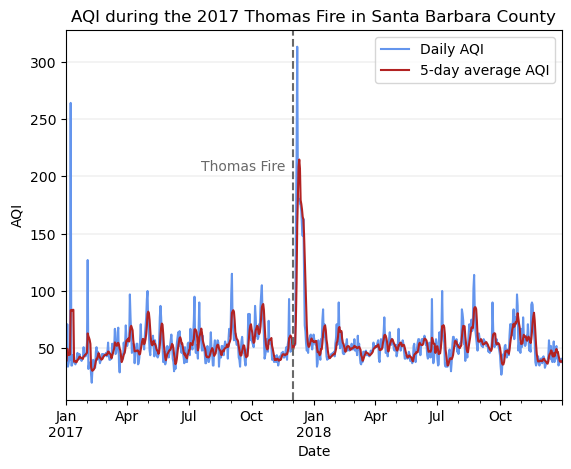

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load in county level AQI data from 2017 and 2018
aqi = pd.concat([pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip'),
                 pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip')])

# Convert column names to lower snake case
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ','_'))

# Make new data frame containing only AQI data for Santa Barbara County
aqi_sb = ((aqi[aqi['county_name'] == "Santa Barbara"])
          .drop(columns = ['state_name', 'county_name', 'state_code', 'county_code'])
         )

# Convert date column to datetime object and set as the index
aqi_sb.date = pd.to_datetime(aqi_sb.date)
aqi_sb = aqi_sb.set_index('date')

# Add new column containing a rolling 5-day AQI average
aqi_sb['five_day_average'] = aqi_sb['aqi'].rolling(window = '5D').mean()

# Plot daily AQI against 5-day average
aqi_sb.aqi.plot(color = 'cornflowerblue')
aqi_sb.five_day_average.plot(color = 'firebrick')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI during the 2017 Thomas Fire in Santa Barbara County')
plt.legend(labels = ['Daily AQI', '5-day average AQI'])
plt.axvline(x = pd.to_datetime('2017-12-01'), color = 'dimgrey', linestyle = 'dashed')
plt.text(x = pd.to_datetime('2017-07-18'), y = 205, s = 'Thomas Fire', color = 'dimgrey')
plt.grid(axis = 'y', linewidth = 0.2)
plt.show()

## 1

a. Read the [Air Quality Index (AQI) Basics](https://www.airnow.gov/aqi/aqi-basics/) from the AirNow.gov portal.

b. Go to [EPA's website on Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 

c. Under "Donwload Data", click on "Pre-generated Data Files".

d. Read the "About the data" section.

## 2
a. Back in the "Pre-generated Data Files" site, click on "Tables of Daily AQI".

b. Copy the URL to the 2017 Daily AQI **by County** ZIP file `daily_aqi_by_county_2017.zip`

Notice we'll be reding the data directly from its ZIP file link. This ZIP file contains a single CSV that has been compressed to save space. 

<!-- BEGIN QUESTION -->

c. In the next code cell read in the data from the URL using the [`pd.read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function with the `compression='zip'` parameter added and store it as `aqi_17`. 

d. In the same cell, read in the data for the 2018 Daily AQI by County ZIP file and store it as `aqi_18`.

In [1]:
import pandas as pd

# Read in data
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip')
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip')

<!-- END QUESTION -->

## 3
a. and b. Use the next two code cells to look at the head of both data frames. Store your results in `aqi_17_head` and `aqi_18_head`. 

In [2]:
# a. Look at the first few rows of the 2017 Daily AQI by County data
aqi_17_head = aqi_17.head()
aqi_17_head

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,28,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,29,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,25,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,40,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,22,Good,PM2.5,01-003-0010,1


In [3]:
# b. Look at the first few rows of the 2018 Daily AQI by County data
aqi_18_head = aqi_18.head()
aqi_18_head

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2018-01-02,42,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2018-01-05,45,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2018-01-08,20,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2018-01-11,25,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2018-01-14,33,Good,PM2.5,01-003-0010,1


<!-- BEGIN QUESTION -->

c. Use this code cell to make some other preliminary data exploration of your choosing.

In [4]:
# Check the data types for each column in data frames aqi_17 and aqi_18
print(aqi_17.dtypes)
print(aqi_18.dtypes)

State Name                   object
county Name                  object
State Code                    int64
County Code                   int64
Date                         object
AQI                           int64
Category                     object
Defining Parameter           object
Defining Site                object
Number of Sites Reporting     int64
dtype: object
State Name                   object
county Name                  object
State Code                    int64
County Code                   int64
Date                         object
AQI                           int64
Category                     object
Defining Parameter           object
Defining Site                object
Number of Sites Reporting     int64
dtype: object


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

d. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

In c., I choose to check the data type of each column in both data frames. I did this so that in future analysis, I can be sure that each column is in the right data type for the methods being used. From doing this, I noticed that the `Date` column is not being stored as a datetime, but rather being stored as an object (or string).

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 4
We currently have two separate data frames. For this exercise we will need to "glue" them one on top of the other. The `pandas` function `pd.concat()` can achieve this. 

Pass `[aqi_17, aqi_18]` as the input of `pd.concat()` and store the output as  `aqi`.  
In the next line run `aqi`.

NOTE: When we concatenate data frames like this, without any extra parameters for `pd.concat()` the indices for the two dataframes are just "glued together", the index of the resulting dataframe is not updated to start from 0. Notice the mismatch between the index of `aqi` and the number of rows i the complete data frame.


In [5]:
# Combine aqi_17 and aqi_18 into one data frame
aqi = pd.concat([aqi_17, aqi_18])
aqi

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,28,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,29,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,25,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,40,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,22,Good,PM2.5,01-003-0010,1
...,...,...,...,...,...,...,...,...,...,...
327536,Wyoming,Weston,56,45,2018-12-27,36,Good,Ozone,56-045-0003,1
327537,Wyoming,Weston,56,45,2018-12-28,35,Good,Ozone,56-045-0003,1
327538,Wyoming,Weston,56,45,2018-12-29,35,Good,Ozone,56-045-0003,1
327539,Wyoming,Weston,56,45,2018-12-30,31,Good,Ozone,56-045-0003,1


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 5

Run the following code cell and use the next markdown cell to give a line by line explanation of the code below the comment "#Simplify column names". You might need to look up the `pandas` documentation.

In [6]:
# Initial column names: notice caps and spaces (difficult to work with!)
print(aqi.columns, '\n')

# Simplify column names
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ','_')
                )
print(aqi.columns, '\n')

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object') 

Index(['state_name', 'county_name', 'state_code', 'county_code', 'date', 'aqi',
       'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object') 



The code below the comment "# Simplify column names" is taking the column names and converting them to lower snake case.
- By calling `aqi.columns =`, we are accessing column names in the data frame aqi and updating them with what is on the other side of the `=`. 
- `.str.lower()` is converting all of the column names to lowercase.
- Finally, `str.replace(' ', '_')` is replacing all spaces in the column names with an underscore.


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 6
In the next code cell:

a. Select only data from `Santa Barbara` county and store it in a new variable `aqi_sb`.

b. Remove the `state_name`, `county_name`, `state_code` and `county_code` columns from `aqi_sb`.

Your dataframe should have the following columns in this order: `date`, `aqi`, `category`, `defining_parameter`, `defining_stie`, `number_of_sites_reporting`. 

In [7]:
# a. Select only data from Santa Barbara county
aqi_sb = aqi[aqi['county_name'] == "Santa Barbara"]

# b. Remove state_name, county_name, state_code, and county_code columns
aqi_sb = aqi_sb.drop(columns = ['state_name', 'county_name', 'state_code', 'county_code'])
aqi_sb

,date,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
28648,2017-01-01,39,Good,Ozone,06-083-4003,12
28649,2017-01-02,39,Good,PM2.5,06-083-2011,11
28650,2017-01-03,71,Moderate,PM10,06-083-4003,12
28651,2017-01-04,34,Good,Ozone,06-083-4003,13
28652,2017-01-05,37,Good,Ozone,06-083-4003,12
...,...,...,...,...,...,...
29128,2018-12-27,37,Good,Ozone,06-083-1025,11
29129,2018-12-28,39,Good,Ozone,06-083-1021,12
29130,2018-12-29,39,Good,Ozone,06-083-1021,12
29131,2018-12-30,41,Good,PM2.5,06-083-1008,12


<!-- END QUESTION -->

 
c. What is the data type of the `date` column? Store your answer in the `date_type` variable. Your answer should contain the type for the **date column only**. 

In [8]:
# Check data type of date column
print(aqi_sb['date'].dtypes)
date_type = aqi_sb['date'].dtypes

object


<!-- BEGIN QUESTION -->

## 7
In the following cell:
1. Update the date column of `aqi_sb` to be a `pandas.datetime` object.
2. Update the index of `aqi_sb` to be the `date` column.

In [9]:
# 1. Update date column to datetime object
aqi_sb.date = pd.to_datetime(aqi_sb.date)

# 2. Make the date column the index of the data frame
aqi_sb = aqi_sb.set_index('date')
aqi_sb

,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
date,,,,,
2017-01-01,39,Good,Ozone,06-083-4003,12
2017-01-02,39,Good,PM2.5,06-083-2011,11
2017-01-03,71,Moderate,PM10,06-083-4003,12
2017-01-04,34,Good,Ozone,06-083-4003,13
2017-01-05,37,Good,Ozone,06-083-4003,12
...,...,...,...,...,...
2018-12-27,37,Good,Ozone,06-083-1025,11
2018-12-28,39,Good,Ozone,06-083-1021,12
2018-12-29,39,Good,Ozone,06-083-1021,12


<!-- END QUESTION -->

## 8
In the next cell we will calculate an average over a [rolling window](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html) using the `rolling()`method for `pandas.Series`:

- `rolling()` is a lazy method, so we need to specify what we want to calculate over each window before it does something. 
- in this example we use the aggregator function `mean()` to calculate the average over each window
- the parameter '5D' indicates we want the window for our rolling average to be 5 days. 
- we get a `pandas.Series` as ouput

Store your answer in the `rolling_average` variable. You should have two columns in your series, `date` and the averages. 

In [10]:
# Calculate AQI rolling average over 5 days
rolling_average = aqi_sb['aqi'].rolling('5D').mean()
rolling_average

date
2017-01-01    39.000000
2017-01-02    39.000000
2017-01-03    49.666667
2017-01-04    45.750000
2017-01-05    44.000000
                ...    
2018-12-27    41.200000
2018-12-28    38.600000
2018-12-29    38.200000
2018-12-30    38.200000
2018-12-31    38.800000
Name: aqi, Length: 730, dtype: float64

## 9 

Without creating any new variables, add the mean of the AQI over a 5-day rolling window as a new column named `five_day_average` to the `aqi_sb` dataframe. 

In [11]:
# Add new column to Santa Barbara county data frame containing the 5-day rolling AQI average
aqi_sb['five_day_average'] = aqi_sb['aqi'].rolling('5D').mean()

<!-- BEGIN QUESTION -->

## 10
Make a line plot showing both the daily AQI and the 5-day average (5-day average on top of the AQI). Make necessary updates for the plot to be accurate, informative, and polished, even if simple. You're welcome to use plotting methods and packages beyond what we have covered in class! 

Can you see the AQI going up during the Thomas Fire in December 2017?

In [12]:
import matplotlib.pyplot as plt

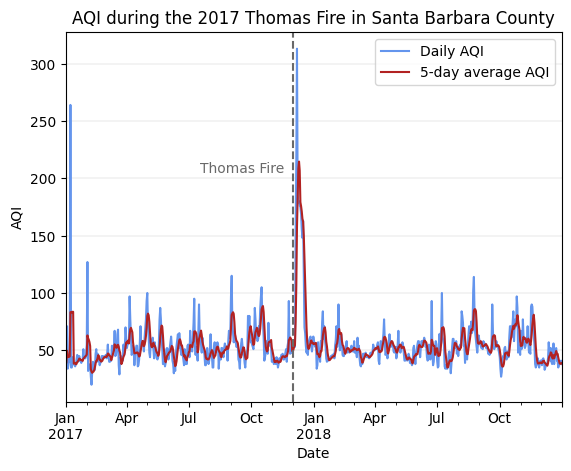

In [104]:
# Plot daily AQI
aqi_sb.aqi.plot(color = 'cornflowerblue')

# Plot 5-day average
aqi_sb.five_day_average.plot(color = 'firebrick')

# Set axis labels
plt.xlabel('Date')
plt.ylabel('AQI')

# Set title
plt.title('AQI during the 2017 Thomas Fire in Santa Barbara County')

# Show legend
plt.legend(labels = ['Daily AQI', '5-day average AQI'])

# Add a labeled vertical line to indicate start of Thomas Fire
plt.axvline(x = pd.to_datetime('2017-12-01'), color = 'dimgrey', linestyle = 'dashed')
plt.text(x = pd.to_datetime('2017-07-18'), y = 205, s = 'Thomas Fire', color = 'dimgrey')

plt.grid(axis = 'y', linewidth = 0.2)

# Show the plot
plt.show()

As you can see in the plot above, the AQI in Santa Barbara County increases dramatically just after the start of the 2017 Thomas Fire.

## 10

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).